# Dermnet - Kamień milowy 1 i 2 (EDA i Feature Engineering)

### 0. Pakiety

In [14]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import cv2

## 1. Cel biznesowy

## 2. Dane
### 2.1. Podział ramki danych train_data na zbiór treningowy (train) i testowy (val)
Dane dzielimy w stosunku 70-30.

In [5]:
df = pd.read_pickle('train_data.pkl')
X_train, X_val = train_test_split(df, test_size=0.3, random_state=42)

### 2.2. Przykładowe obrazy

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10889 entries, 7735 to 7270
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   10889 non-null  object
dtypes: object(1)
memory usage: 170.1+ KB


In [7]:
X_train.head(1)

,image
7735,"[[[223, 181, 175], [203, 167, 155], [199, 167,..."


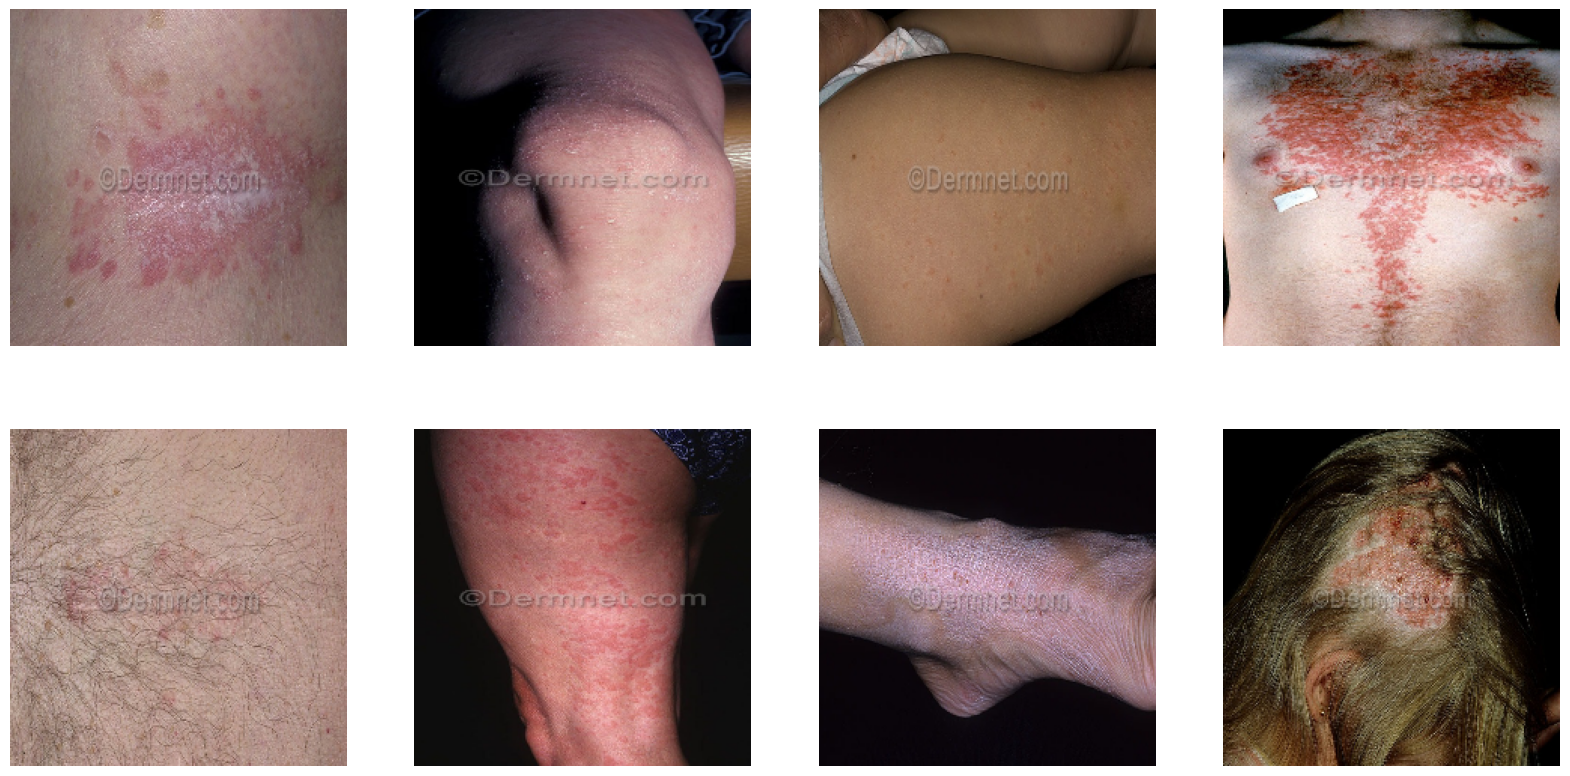

In [8]:
# show random eight pictures from data set
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
random.seed(2137)
for i in range(8):
    img = random.choice(X_train['image'])
    ax = axes[i//4, i%4]
    ax.imshow(img)
    ax.axis('off')

### 2.3. Typy danych

In [15]:
# check data types
print(X_train['image'].apply(type).value_counts())

image
<class 'numpy.ndarray'>    10889
Name: count, dtype: int64


### 2.4. Rozmiary obrazów

In [16]:
# check images sizes
image_dimensions = X_train['image'].apply(lambda x: x.shape)
print(image_dimensions.value_counts())

image
(224, 224, 3)    10889
Name: count, dtype: int64


Wszystkie obrazy mają te same wymiary:
(224, 224, 3) - (wysokość, szerokość, liczba kanałów), czyli
224, 224 - każdy obraz ma wymiary 224 piksele na 224 piksele.
3 - obrazy są w formacie RGB, czyli mają 3 kanały kolorów (czerwony, zielony, niebieski)

15557 - liczba obrazów w zbiorze

<span style="color:orange">**Wniosek** </span> - zbiór danych jest jednolity pod względem rozmiarów obrazów.

### 2.5. Analiza cech obrazów

#### 2.5.1. Histogramy intensywności pikseli

In [22]:
def plot_intensity_histogram(ax, image):
    # convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # intensity histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0,256])
    
    # show histogram
    ax.plot(hist, color='gray')
    ax.set_xlabel('Wartość piksela')
    ax.set_ylabel('Liczba pikseli')
    ax.set_title('Histogram intensywności pikseli')

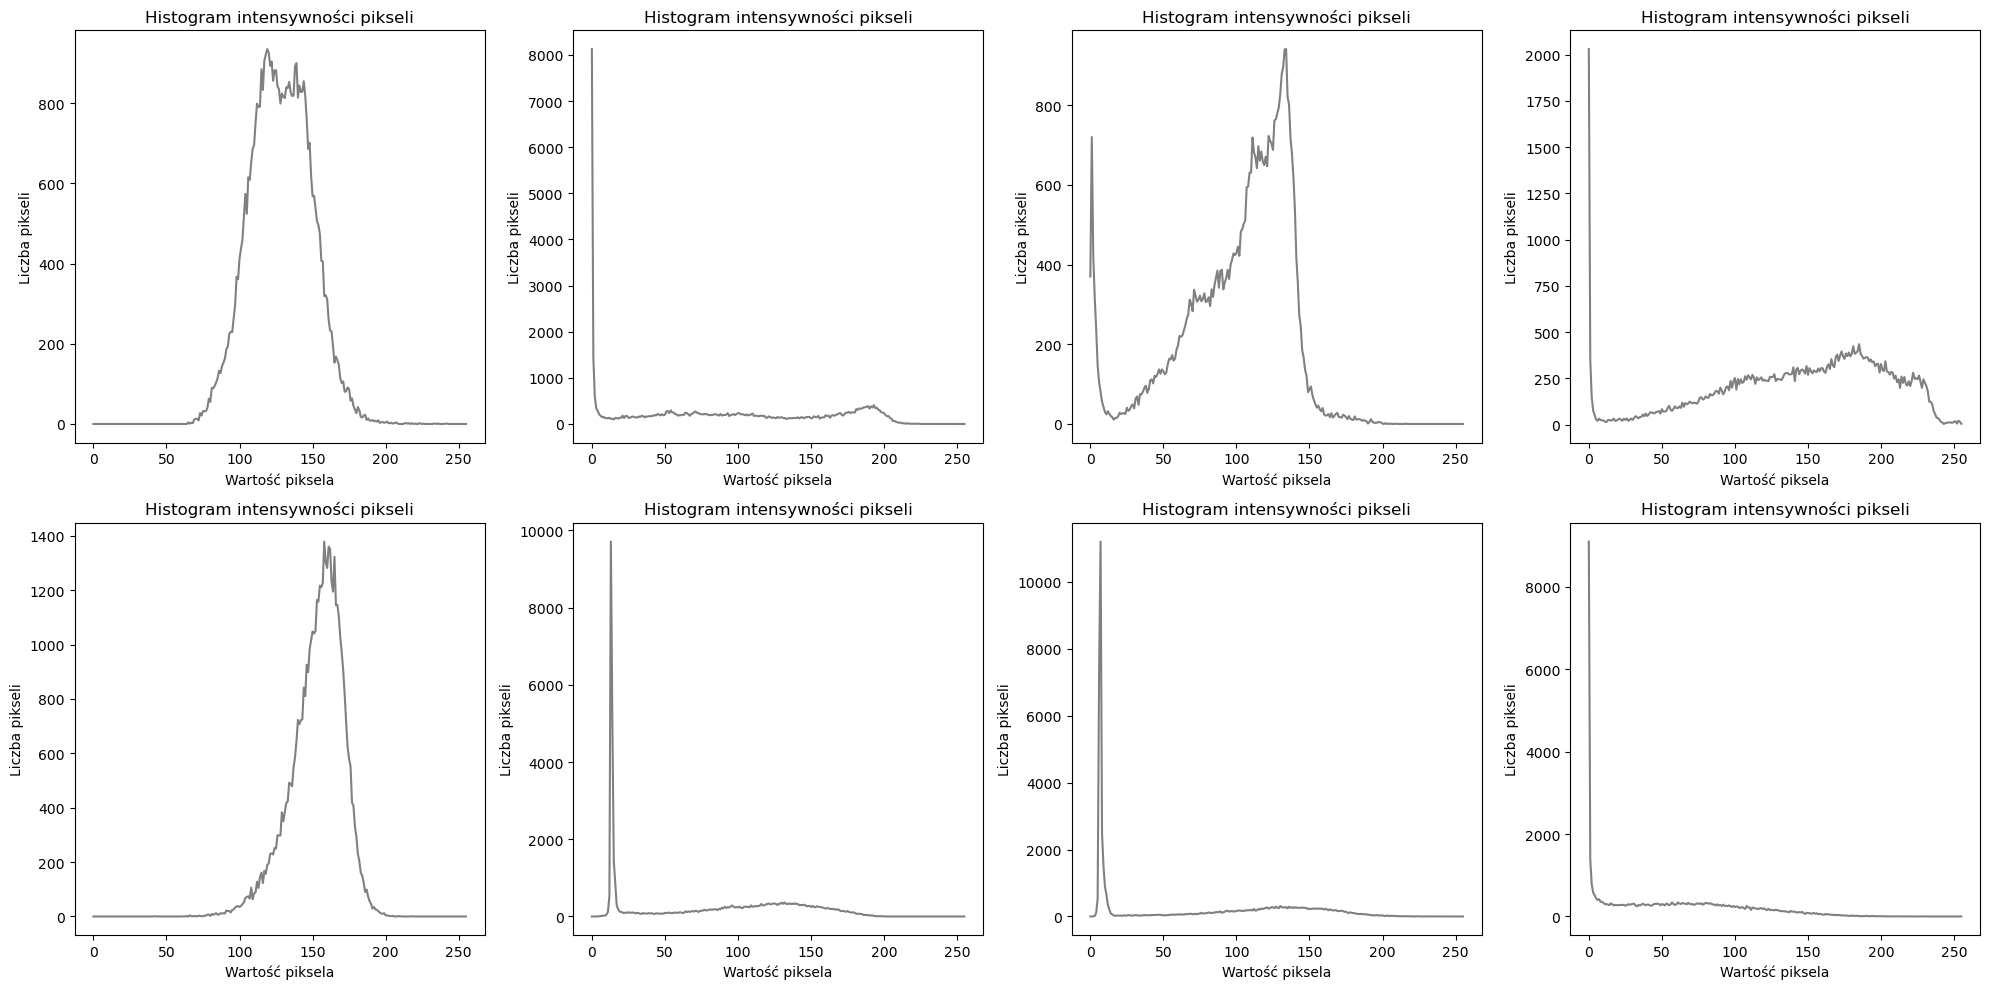

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
random.seed(2137)
for ax_row in axes:
    for ax in ax_row:
        img = random.choice(X_train['image'])
        plot_intensity_histogram(ax, img)

plt.tight_layout()
plt.show()

#### 2.5.2. Analiza kolorów

In [32]:
def plot_color_distribution(ax, image, color_space='rgb'):
    # split the image into color channels
    channels = cv2.split(image)
    
    # plot color channel histograms
    for i, channel in enumerate(channels):
        hist = cv2.calcHist([channel], [0], None, [256], [0,256])
        ax.plot(hist, color='gray')
        ax.set_xlim([0, 256])
        ax.set_xlabel('Wartość piksela')
        ax.set_ylabel('Liczba pikseli')
        ax.set_title(f'Kanał {i+1}')

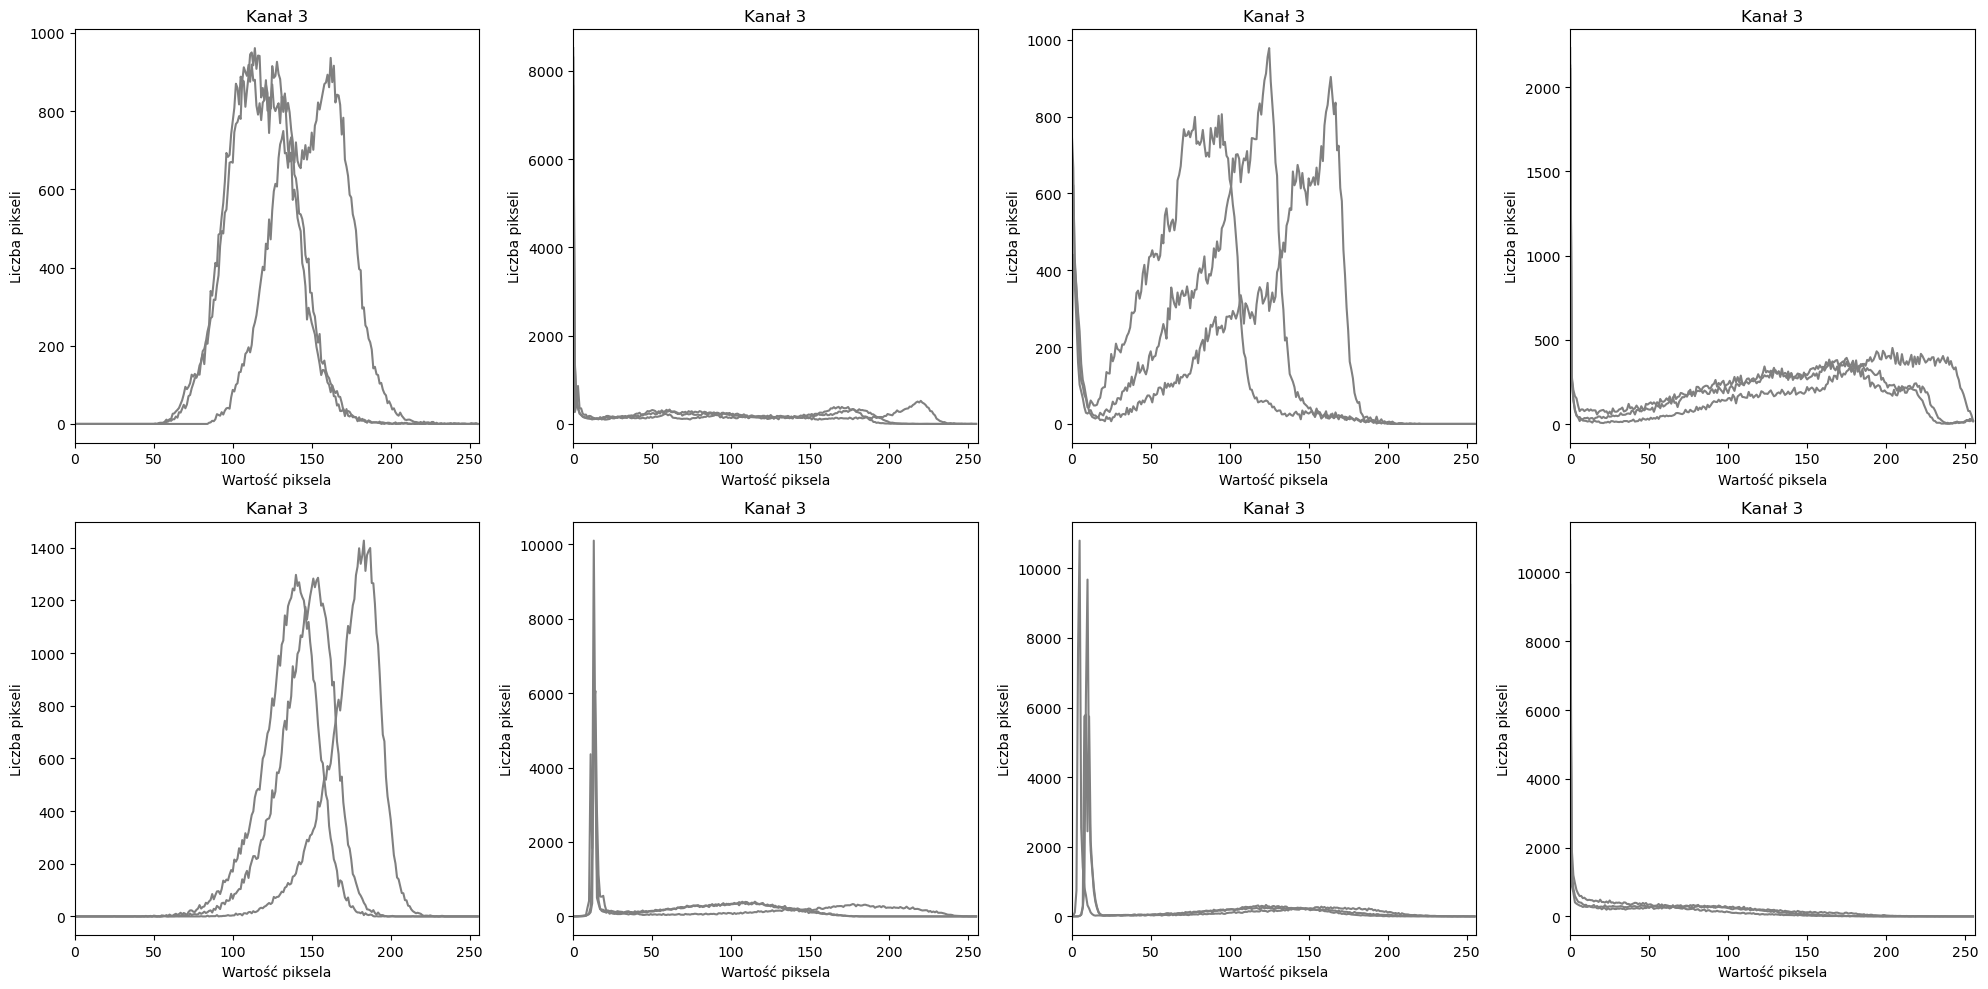

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
random.seed(2137) 
for ax_row in axes:
    for ax in ax_row:
        img = random.choice(X_train['image'])
        plot_color_distribution(ax, img)

plt.tight_layout()
plt.show()